# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [210]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [211]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [212]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [213]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


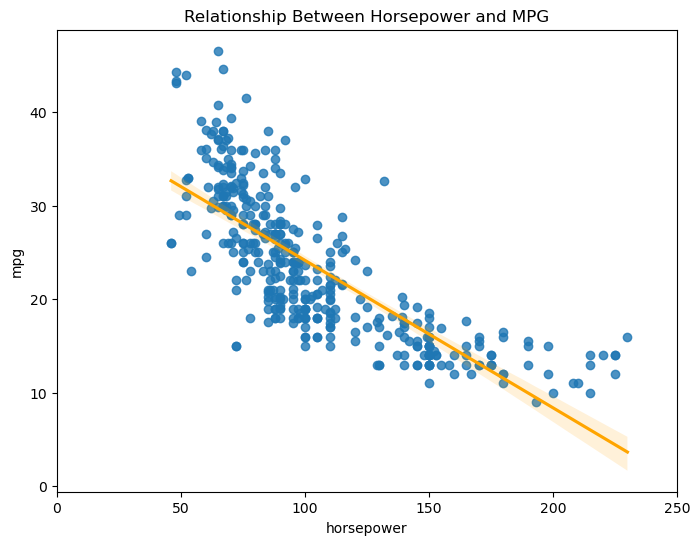

In [214]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [215]:
# call_on_students(1)

#### Answer: 

- The above graph is showing us the relationship between the residual sun of squares and the coefficient on horsepower. RSS represents loss function. RSS is a measure of error, and with gradient descent, we're looking to find the lowest possible error. The purpose of graphing the two is find the coefficient at which RSS is the lowest, aka the bottom of the above curve where slope is about -0.158. 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [216]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [217]:
# call_on_students(1)

#### Answer: 

- step size is the magnitude of the change in slope/coeff that we make each time we calculate a new RSS in searching for the optimal slope to minimize RSS. Learning rate controls how big or small the steps are. A bigger learning rate leads to a larger step.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [218]:
# call_on_students(1)

#### Answer: 

- logistic regression is used for a discreet target
- output is always between 0 and 1 and indicates the probability of a certain class
- linear regression is used for continuous target variables and the resulting coefficients measure the impact of each independent variable on the dependent variable.
- it is a parametric model


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [219]:
# call_on_students(1)

#### Answer: 

- logistic regression models are great for predicting outcomes or for classifying records as one of two possiblities given a set of indepedent variables.
- linear regression might be better when we're trying to do inferential modeling as opposed to predictive modeling. i.e. when we're trying to figure out if and by how much a variable impacts our target variable.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [220]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [221]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [222]:
# call_on_students(1)

In [223]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [224]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_train_scaled

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_test_scaled


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,-0.886314,-0.982221,-0.960776,-0.966126,0.885043,-1.151086,0.545425
274,-0.886314,-0.743818,0.235059,-0.249731,0.080871,0.512064,0.545425
246,-0.886314,-1.029902,-1.194744,-1.425989,0.325619,0.512064,1.777333
55,-0.886314,-1.029902,-0.934780,-1.242753,1.759142,-1.428278,-0.686483
387,-0.886314,-0.562632,-0.518837,-0.255642,0.045907,1.620831,-0.686483
...,...,...,...,...,...,...,...
232,-0.886314,-0.457734,-0.466844,-0.314750,0.185763,0.234872,-0.686483
193,-0.886314,-1.087119,-1.402716,-1.148180,2.353530,-0.042319,-0.686483
238,-0.886314,-0.972685,-0.726808,-0.964943,-0.478553,0.234872,0.545425
152,0.268981,0.486343,-0.882787,0.503311,1.933962,-0.319511,-0.686483


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [225]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [226]:
# Code to explore
y_train.describe()

count    262.000000
mean       0.255725
std        0.437103
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

#### Answer:

- target train data implies that 26% of time target variable is 1, given target is either 0 or 1 and mean of target column is 0.256

should be in in terms of majority class.


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- baseline is 26% (datset is unbalance)


#### Part 3: How accurate would that baseline be on test data?


In [227]:
# Code to find the answer
y_test.describe()

count    130.000000
mean       0.246154
std        0.432436
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: target, dtype: float64

#### Answer:

- mean of test dataset is 0.246, so baseline would be off by about 1 percentage point on test data. 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [228]:
# call_on_students(1)

#### Answer:

- based on this breakdown the dataset is very unbalance with there being far more rows where target equals 0 than there are rows where target equals 1. One thing you could do to fix this is upsampling the minority class. You could do this using SMOTE from sklearn.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [229]:
# call_on_students(1)

In [230]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train_scaled, y_train)

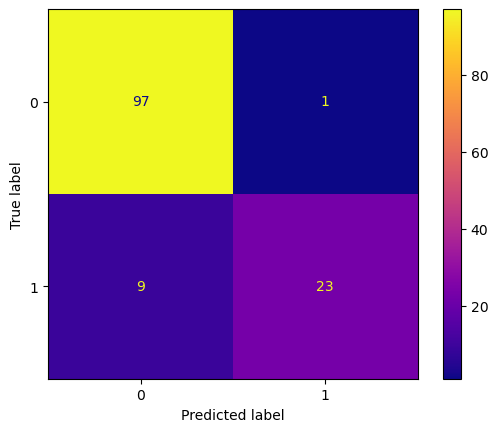

In [231]:
# Plot a confusion matrix on the test data

ConfusionMatrixDisplay.from_estimator(logreg_model, X_test_scaled, y_test, cmap="plasma")

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [232]:
# call_on_students(1)

In [233]:
# Accuracy
y_hat_test = logreg_model.predict(X_test_scaled)

accuracy_score(y_test, y_hat_test)

0.9230769230769231

In [234]:
# Precision
precision_score(y_test, y_hat_test)

0.9583333333333334

In [235]:
# Recall
recall_score(y_test, y_hat_test)

0.71875

In [236]:
# F1-Score
f1_score(y_test, y_hat_test)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [237]:
# call_on_students(1)



In [238]:
# Calculate roc-auc
#roc_auc_score, roc_curve
roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])


0.9811862244897959

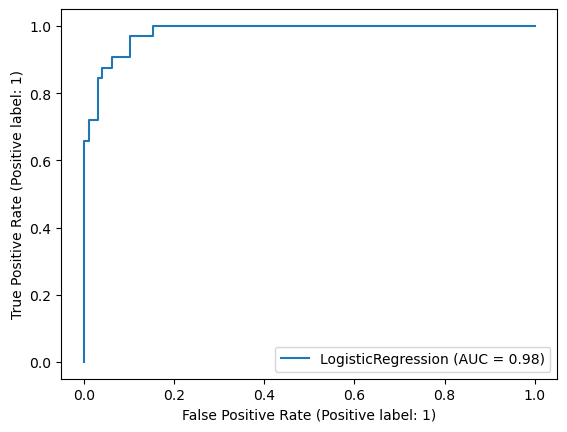

In [239]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg_model, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [240]:
# call_on_students(1)

#### Answer:

- model has 92% accuracy meaning model predicts correctly 92% of the time.
- model has 96% precission meaning that 96% of the model's predicted 1's were true 1's.
- model has 72% recall aka true positive rate. the model correctly identifed 72% of the true 1's.
- model has 82% f1 score. this is a combination of recall and precision.
- An AUC of 0.98 indicates that the model predicts positive class correctly 98% of the time.

More false negatives than false positives (better precision than recall)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [241]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

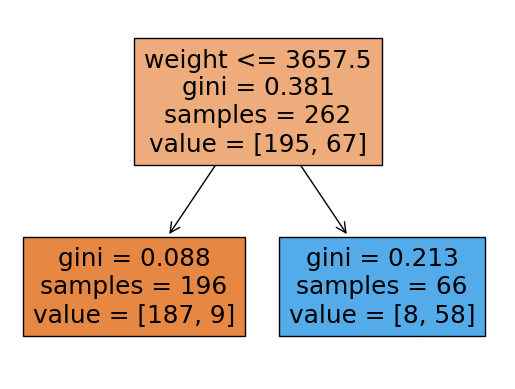

In [242]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

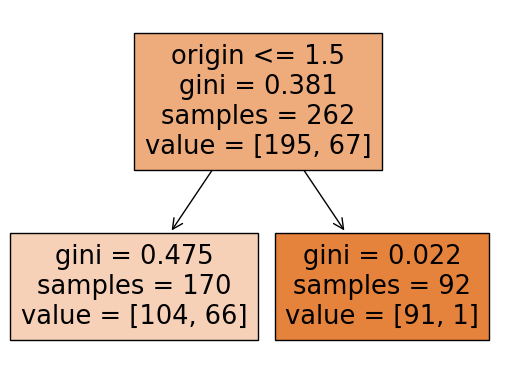

In [243]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [244]:
# call_on_students(1)

#### Answer:

- the weight tree does a better job. You can see far fewer of the minority class in the final nodes than you do in the final nodes of the origin tree. also the two gini scores on the bottom nodes of the weight tree are closer to zero than the two for the origin tree.

- add the ginis together or find mean of ginis. smaller gini is better aka more homogenous.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [245]:
# call_on_students(1)

In [250]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

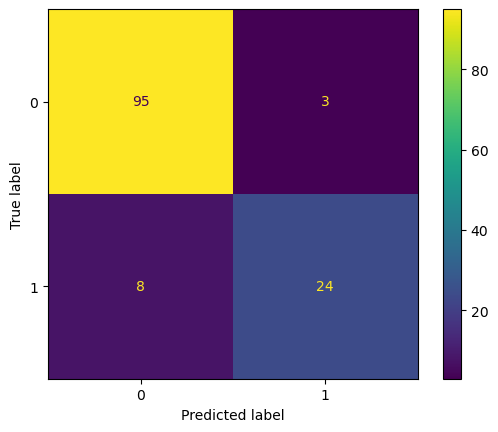

In [251]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test)

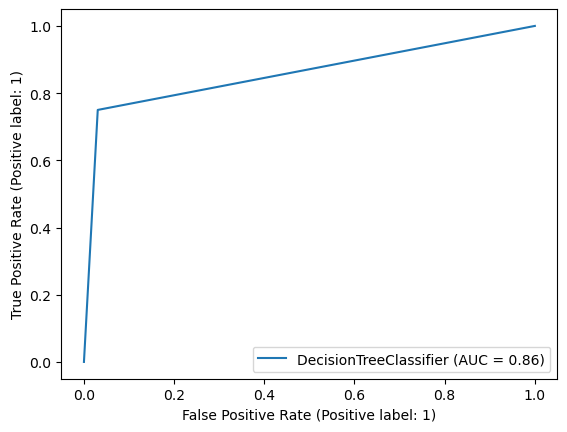

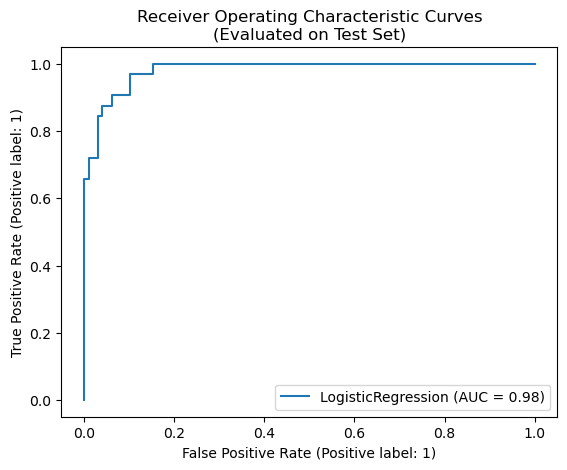

In [252]:
# Code to visualize the ROC curves for the models we've done
#fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)


plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [249]:
# call_on_students(1)

#### Answer:

- The logistic regression model has a higher AUC at 0.98 vs. 0.86 for the decision tree. with that said, the log reg model is better as it predicts the correct result more often than the decision tree model.
